In [5]:
import tensorflow as tf
print(tf.__version__)


2.17.1


### Import the basic required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading dataset and loading in dataframe

In [18]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### This is a binary classification problem and we need to predict if the customer is going to exit from the bank.

In [19]:
## Divide the dataset into independent and dependent features

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [20]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [21]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


### Feature Engineering

In [22]:
geography = pd.get_dummies(X['Geography'],drop_first=True).astype(int)

gender = pd.get_dummies(X['Gender'],drop_first=True).astype(int)

In [23]:
# Concatenate these variables with dataframe

X = X.drop(['Geography','Gender'],axis=1)
# axis = 1 refers to columns and 0 to rows

In [24]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [26]:
X = pd.concat([X,geography,gender],axis=1)

### Splitting the dataset into Training set and Testing set

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Feature Scaling

In [28]:
# We mainly need to do it for distance based algorithms which in this case is since we are working on ANN

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [30]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [31]:
X_train.shape

(8000, 11)

### Creating our ANN(Artificial Neural Network)

In [33]:
from tensorflow.keras.models import Sequential # To create a linear stack of layers where each layer has exactly one input and one output
from tensorflow.keras.layers import Dense # For creating the different layers
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU # Activation functions
from tensorflow.keras.layers import Dropout # To drop random units (neurons)  or to set to zero during training to prevent overfitting (for regularization)

In [34]:
# Initializing the ANN
classifier = Sequential()

In [37]:
# Adding the input layer
classifier.add(Dense(units=11,activation='relu')) # Adding 11 neurons and activation function as ReLU

In [61]:
# Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
#classifier.add(Dropout(0.2))  # if we wanted to add dropout in our layers to add regularization

In [39]:
# Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [40]:
# Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [42]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Added adam optimizer and binary cross entropy as loss function and by default adam uses a learning rate of 0.01

In [43]:
#opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
# In case anyone want's to customize the learning rate

### Training our model

In [49]:
# Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

# Stops training when a monitored metric has stopped improving

In [50]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8705 - loss: 0.3105 - val_accuracy: 0.8508 - val_loss: 0.3711
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8722 - loss: 0.3150 - val_accuracy: 0.8550 - val_loss: 0.3750
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8719 - loss: 0.3127 - val_accuracy: 0.8542 - val_loss: 0.3689
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8783 - loss: 0.3036 - val_accuracy: 0.8497 - val_loss: 0.3684
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8751 - loss: 0.3195 - val_accuracy: 0.8531 - val_loss: 0.3698
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8801 - loss: 0.3069 - val_accuracy: 0.8550 - val_loss: 0.3711
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8754 - loss: 0.3011 - val_accuracy: 0.8531 - val_loss: 0.3689
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8755 - loss: 0.3016 - 

In [51]:
model_history

In [52]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

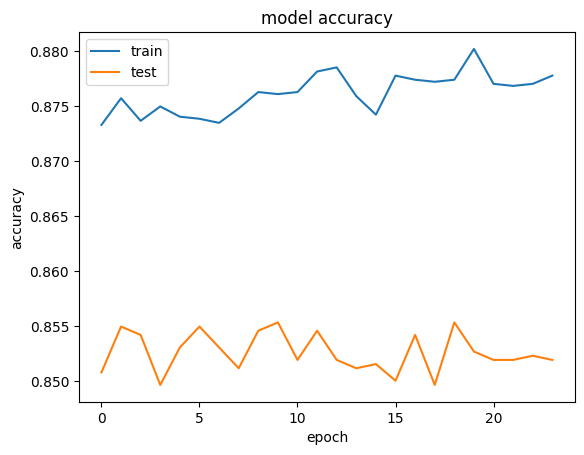

In [54]:
# Summarizing the history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

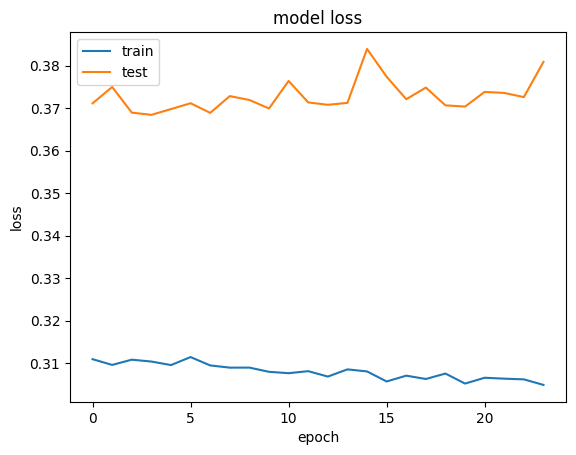

In [55]:
# Summarizing the history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

### Making predictions and evaluating the model

In [56]:
# Predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [57]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1500,   95],
       [ 195,  210]])

In [58]:
# Calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [59]:
score

0.855

In [60]:
# Getting the assigned weights in my ANN
classifier.get_weights()

[array([[ 0.41639966, -0.07840393,  0.2002585 ,  0.15505077,  0.06277665,
         -0.26796097, -0.00722708, -0.27956042, -0.1359548 , -0.0322783 ,
          0.21521471],
        [-0.44888964,  0.28230664, -0.6228586 ,  0.62169075, -0.6133038 ,
          0.16059755,  0.73588145, -0.49117446,  0.6923008 , -0.3757908 ,
         -0.5173832 ],
        [-0.29271796,  0.21430713,  0.03045707,  0.15125386,  0.07846135,
         -0.17644696, -0.01877231,  0.12889388,  0.02240003, -0.06357582,
          0.18385816],
        [ 0.14251462,  0.23406792,  0.18783672, -0.4220534 , -0.6569955 ,
          0.19515237,  0.44015825,  0.1940854 , -0.4260257 , -0.48014134,
         -0.35573217],
        [-0.21461776, -0.89846176, -0.22148806,  0.09745195,  0.08896095,
          0.21388993,  0.8747783 ,  0.06530159, -0.7682835 ,  0.892086  ,
         -0.01244937],
        [-0.14767659,  0.20400155,  0.71649027,  0.02444971,  0.5849405 ,
          0.27696285,  0.08551253, -0.5430805 , -0.23039049, -0.2106899